Author: Audrey Ao

## Introduction

In this notebook, all explorations, anlysis and results of three datasets for the sub_question 'Do people have preferences about which week do more activities in a month?' will be shown.<br>(beginning date:2022/10/23, end date: 2022/10/23)

#### External libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
# import numpy as np
import math
#(beginning date:2022/10/24, end date: 2022/10/24)

#### Read data

In [2]:
p1 = pd.read_csv("D:/university/s2/3406/2022-DATA3406-RE06-Group04/src/resources/Participant-01-second-detail.csv")
p2 = pd.read_csv("D:/university/s2/3406/2022-DATA3406-RE06-Group04/src/resources/Participant-02-detail.csv")
p5 = pd.read_csv("D:/university/s2/3406/2022-DATA3406-RE06-Group04/src/resources/Participant-05-detail.csv")
#(beginning date:2022/10/11, end date: 2022/10/24)

Participant1, participant2 and participant3 datasets have been saved in p1, p2 and p3 respectivly.<br>(beginning date:2022/10/24, end date: 2022/10/24)

##### Data cleaning

In this section, I have checked null value for all three datasets, and only keep columns that I need for the further analysis. Besides, since the description on the canvas stated that only this year data are needed, all data that for 2022 will be delate.<br>(beginning date:2022/10/11, end date: 2022/10/24)

Firstly, checking whether there are null values contained in the datasets.<br>(beginning date:2022/10/11, end date: 2022/10/24)

In [3]:
print(p1.isnull().sum().sum())
print(p2.isnull().sum().sum())
print(p5.isnull().sum().sum())
#(beginning date:2022/10/11, end date: 2022/10/24

0
0
0


As result above showed, there is no null value contained in the datasets.
Now, I will only keep and save columns that I need to the new varibales.<br>(beginning date:2022/10/11, end date: 2022/10/24)

In [4]:
def keep_column(df):
    data = pd.DataFrame({"Date": df['Date'], "Count":df['Count']})
    # convert type of 'Date' to Datetimes type
    data['Date'] = pd.to_datetime(data['Date'])
    # keep data in 2022
    result = data[(data['Date'] >= '2022-01-01') & (data['Date'] <= '2022-12-31')]
    
    return result
p1_cleaned = keep_column(p1)
p2_cleaned = keep_column(p2)
p5_cleaned = keep_column(p5)
#     data['Date'] = pd.to_datetime(data['Date'])
#     per_day_data =  data.groupby(['Date']).sum()
#(beginning date:2022/10/11, end date: 2022/10/24

Now, Lets check whether each datasets cleaned successfuly.<br>(beginning date:2022/10/11, end date: 2022/10/24)

In [5]:
print(p1_cleaned)
print(p2_cleaned)
print(p5_cleaned)

            Date  Count
0     2022-01-01     32
1     2022-01-01     49
2     2022-01-01     14
3     2022-01-01     20
4     2022-01-01     16
...          ...    ...
34471 2022-09-25    268
34472 2022-09-25    135
34473 2022-09-25     98
34474 2022-09-25    189
34475 2022-09-25     20

[34476 rows x 2 columns]
            Date  Count
0     2022-01-01     31
3     2022-01-01     29
4     2022-01-01     13
5     2022-01-01    103
6     2022-01-01    553
...          ...    ...
31633 2022-09-01    498
31634 2022-09-01     26
31635 2022-09-01    110
31636 2022-09-01     21
31637 2022-09-01     76

[31635 rows x 2 columns]
            Date  Count
0     2022-01-27      4
1     2022-01-02     78
2     2022-01-02     66
3     2022-01-02     57
4     2022-01-02     99
...          ...    ...
12132 2022-09-01     59
12133 2022-09-01    102
12134 2022-09-01     15
12135 2022-09-01     35
12136 2022-09-01     47

[12137 rows x 2 columns]


As results above showd, all datasets only contains columns that we need. Then,I will do data analysis and answer my sub_questions.<br>(beginning date:2022/10/11, end date: 2022/10/24)


#### Data analysis

I will answer sub_question assigned to me in this section. In order to know which week people prefer do more exercises in month, the datasets need to be grouped by each day, and aggreated data by week. Lastly, calculate the sum of steps per week, and filter the week that with max steps count per month.<br>(beginning date:2022/10/25, end date: 2022/10/25)

In [6]:
def weekly_data(df):
    df['Date'] = pd.to_datetime(df['Date'])
    # group data by date
    per_day_data =  df.groupby(['Date']).sum()
    # convert data seriers index to data column
    per_day_data.reset_index(inplace=True)
    # group per_day data by week.
    weekly_data = per_day_data.resample('W', on="Date").sum()
    #convert data seriers index to data column
    weekly_data.reset_index(inplace=True)
    # extract month from date and save 'month' into month column.
    weekly_data['month'] = pd.DatetimeIndex(weekly_data['Date']).month
    return weekly_data

p1_weekly = weekly_data(p1_cleaned)
p2_weekly = weekly_data(p2_cleaned)
p5_weekly = weekly_data(p5_cleaned)
#(beginning date:2022/10/25, end date: 2022/10/25

All datasets have been grouped by week, and total steps for each week has been calculated, the last column contained a month that the corresponded date belongs to. And I will check all grouped data by print them out.<br>(beginning date:2022/10/11, end date: 2022/10/24

In [7]:
print(p1_weekly)
print(p2_weekly)
print(p5_weekly)
#(beginning date:2022/10/25, end date: 2022/10/25)

         Date   Count  month
0  2022-01-02   41551      1
1  2022-01-09  127289      1
2  2022-01-16  137307      1
3  2022-01-23  134580      1
4  2022-01-30  121104      1
5  2022-02-06   96668      2
6  2022-02-13  107738      2
7  2022-02-20   90998      2
8  2022-02-27   77026      2
9  2022-03-06   67415      3
10 2022-03-13   82315      3
11 2022-03-20  120349      3
12 2022-03-27   99082      3
13 2022-04-03   92623      4
14 2022-04-10   85668      4
15 2022-04-17   92950      4
16 2022-04-24   69616      4
17 2022-05-01  117220      5
18 2022-05-08  110720      5
19 2022-05-15   62712      5
20 2022-05-22   65807      5
21 2022-05-29   53941      5
22 2022-06-05  115544      6
23 2022-06-12  149851      6
24 2022-06-19  116797      6
25 2022-06-26   92001      6
26 2022-07-03   98782      7
27 2022-07-10   84381      7
28 2022-07-17  122183      7
29 2022-07-24   89450      7
30 2022-07-31   83902      7
31 2022-08-07   94187      8
32 2022-08-14   99441      8
33 2022-08-21 

All data has been successfuly grouped by week as above showed. 
Then, since we would like to finger out which week in a month that participant perfer to do more exercises, I will indicate which week each date belongs to.<br>(beginning date:2022/10/25, end date: 2022/10/25)

In [28]:
def find_week_with_max_steps(df):
    # add_week_of_month
    df['week_in_month'] = df['Date'].apply(lambda x : x.day)/7
    df['week_in_month'] = df['week_in_month'].apply(lambda x: math.ceil(x))
    return df

p1_week = find_week_with_max_steps(p1_weekly)
p2_week = find_week_with_max_steps(p2_weekly)
p5_week = find_week_with_max_steps(p5_weekly)

In [29]:

# # df.groupby('reportno').apply(lambda t: t[t.gettime==t.gettime.max()])
# a.apply(lambda t: t[t.Count==t.Count.max()])

    
# # groups = apprix_df.groupby(apprix_df.Qualification)
# # ms_df = groups.get_group("MS")
# # mba_df=groups.get_group("MBA")
# # phd_df=groups.get_group("PhD")

p1_final = p1_week.groupby('month').apply(lambda t: t[t.Count==t.Count.max()])
p2_final = p2_week.groupby('month').apply(lambda t: t[t.Count==t.Count.max()])
p5_final = p5_week.groupby('month').apply(lambda t: t[t.Count==t.Count.max()])
print(p1_final)
print(p2_final)
print(p5_final)


               Date   Count  month  week_in_month
month                                            
1     2  2022-01-16  137307      1              3
2     6  2022-02-13  107738      2              2
3     11 2022-03-20  120349      3              3
4     15 2022-04-17   92950      4              3
5     17 2022-05-01  117220      5              1
6     23 2022-06-12  149851      6              2
7     28 2022-07-17  122183      7              3
8     33 2022-08-21  130916      8              3
9     36 2022-09-11  122983      9              2
               Date   Count  month  week_in_month
month                                            
1     3  2022-01-23  119082      1              4
2     7  2022-02-20   99547      2              3
3     11 2022-03-20  124428      3              3
4     13 2022-04-03  101214      4              1
5     17 2022-05-01  106251      5              1
6     23 2022-06-12  136940      6              2
7     28 2022-07-17  105891      7              3


All date has been indicated which week they belongs to in a month, and the week with max steps account in a month over 9 months has been indicated.<br>(date:2022/10/25, end date: 2022/10/25)

##### Visualization

I will visualize results of three participants.<br>(date:2022/10/25, end date: 2022/10/25)

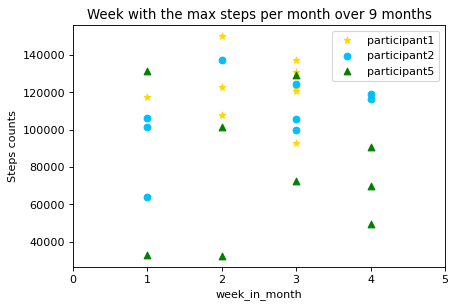

In [30]:
plt.figure(dpi=80)
plt.scatter(p1_final['week_in_month'], p1_final['Count'], marker='*', c ='gold')
plt.scatter(p2_final['week_in_month'], p2_final['Count'], marker='o', c = 'deepskyblue')
plt.scatter(p5_final['week_in_month'], p5_final['Count'], marker='^', c = 'green')
plt.xlabel("week_in_month")
plt.ylabel("Steps counts")
x = [0,1, 2, 3, 4, 5]
values = range(len(x))
plt.xticks(values,x)
plt.title("Week with the max steps per month over 9 months")
plt.legend(["participant1","participant2", "participant5"])
#(date:2022/10/25, end date: 2022/10/25)

We can see from above, there is no certain trend of which weeks participants walks more. <br>(date:2022/10/25, end date: 2022/10/25)

#### Conclusion

Based on the analysis above, we can simply conclued that participants don't have perference of walking more in a certain week of a month.<br>(date:2022/10/25, end date: 2022/10/25)